In [1]:
import os
import pandas as pd
import numpy as np
import scipy
from scipy import optimize
import matplotlib.pyplot as plt

from lmfit import Model

/home/edi/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [34]:
def load_dataset(path_folder,verbose=True):
    #path='./db/' # dove sono i file excel
    files = os.listdir(path_folder)
    i = 0
    
    if verbose:
        print('File caricati:')
    
    for file in files:
        if verbose:
            print(file)
        file = path + file
        meta = pd.read_excel(file,sheet_name=0,header=None)
        freq = pd.read_excel(file,sheet_name=1)
        fft = pd.read_excel(file,sheet_name=2)
        
        if i==0:
            a=np.array([meta.iloc[0,1],meta.iloc[3,1]])
            info = pd.DataFrame([a],columns=['run','cavfreq']) # -> Qui tengo le frequenze di cavità 
        
            data = pd.DataFrame({'freq':freq[1],'fft0':fft[1]}) # -> Qui frequenze e fft
            
        else:
            info.loc[len(info)]=list([meta.iloc[0,1],meta.iloc[3,1]])
            
            colname = 'fft' + str(i)
            data[colname]=fft[1]
            
        i += 1
        
        
    info['run'] = pd.to_numeric(info['run'],downcast='integer')
    return data,info

In [27]:
data, info = load_dataset('db/')
data

File caricati:
AnalyzedDataFFT_Run_409_sliced.xlsx
AnalyzedDataFFT_Run_407_sliced.xlsx
AnalyzedDataFFT_Run_415_sliced.xlsx
AnalyzedDataFFT_Run_404_sliced.xlsx
AnalyzedDataFFT_Run_413_sliced.xlsx
AnalyzedDataFFT_Run_395_sliced.xlsx
AnalyzedDataFFT_Run_394_sliced.xlsx
AnalyzedDataFFT_Run_401_sliced.xlsx
AnalyzedDataFFT_Run_389_sliced.xlsx
AnalyzedDataFFT_Run_392_sliced.xlsx
AnalyzedDataFFT_Run_399_sliced.xlsx
AnalyzedDataFFT_Run_397_sliced.xlsx
AnalyzedDataFFT_Run_411_sliced.xlsx


,freq,fft0,fft1,fft2,fft3,fft4,fft5,fft6,fft7,fft8,fft9,fft10,fft11,fft12
0,1.035190e+10,0.000049,0.000048,0.000048,0.000049,0.000048,0.000048,0.000049,0.000049,0.000047,0.000048,0.000049,0.000048,0.000048
1,1.035190e+10,0.000049,0.000048,0.000048,0.000049,0.000048,0.000048,0.000049,0.000049,0.000047,0.000048,0.000049,0.000048,0.000048
2,1.035190e+10,0.000049,0.000048,0.000048,0.000049,0.000048,0.000048,0.000049,0.000049,0.000047,0.000048,0.000049,0.000048,0.000048
3,1.035190e+10,0.000049,0.000048,0.000048,0.000049,0.000048,0.000048,0.000049,0.000049,0.000047,0.000048,0.000049,0.000048,0.000048
4,1.035190e+10,0.000049,0.000048,0.000048,0.000049,0.000048,0.000048,0.000049,0.000049,0.000047,0.000048,0.000049,0.000048,0.000048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,1.035390e+10,0.000049,0.000048,0.000048,0.000049,0.000048,0.000048,0.000049,0.000049,0.000047,0.000048,0.000049,0.000048,0.000048
3068,1.035390e+10,0.000049,0.000048,0.000048,0.000049,0.000048,0.000048,0.000049,0.000049,0.000047,0.000048,0.000049,0.000048,0.000048
3069,1.035390e+10,0.000049,0.000048,0.000048,0.000049,0.000048,0.000048,0.000049,0.000049,0.000047,0.000048,0.000049,0.000048,0.000048
3070,1.035390e+10,0.000049,0.000048,0.000048,0.000049,0.000048,0.000048,0.000049,0.000049,0.000047,0.000048,0.000049,0.000048,0.000048


In [28]:
info

,run,cavfreq
0,409,1.035336e+10
1,407,1.035335e+10
2,415,1.035339e+10
3,404,1.035337e+10
4,413,1.035338e+10
5,395,1.035347e+10
6,394,1.035347e+10
7,401,1.035339e+10
8,389,1.035352e+10
9,392,1.035349e+10


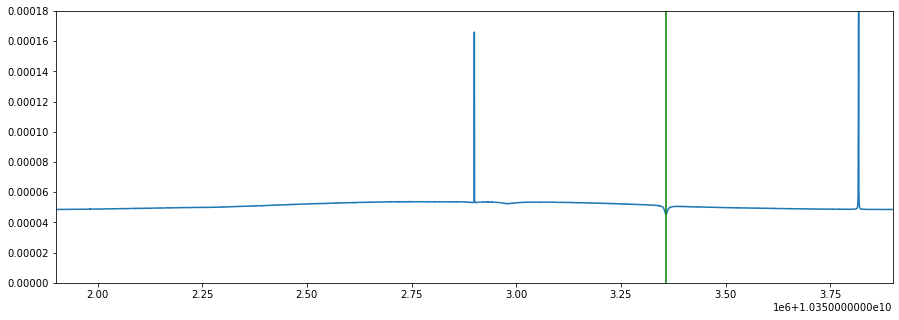

In [29]:
# I dati sono così

plt.figure(figsize=(15,5))
plt.plot(data['freq'],data['fft0'])
#plt.plot(data['freq'],data['fft1'])
#plt.plot(data['freq'],data['fft2'])
#plt.plot(data['freq'],data['fft3'])
#plt.plot(data['freq'],data['fft4'])
#plt.plot(data['freq'],data['fft5'])

plt.vlines(info['cavfreq'][0],0,.00018,'green') # frequenza di cavità
plt.ylim([0,.00018])
plt.xlim([min(data['freq']),max(data['freq'])])
plt.show()

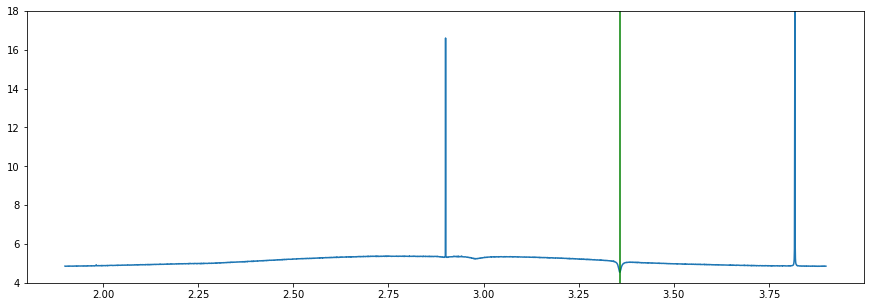

In [30]:
# trasformo le frequenze in Mhz e le traslo così è più semplice lavorare
info['cavfreq'] = (info['cavfreq']/1e9 - 10.35) *1e3
data['freq'] = (data['freq']/1e9 - 10.35) *1e3

# e trasformo anche fft
for name in data:
    if name != 'freq':
        data[name] *= 1e5

# dopo la trasformazione

plt.figure(figsize=(15,5))
plt.plot(data['freq'],data['fft0'])

plt.vlines(info['cavfreq'][0],4,18,'green') # frequenza di cavità
plt.ylim([4,18])
plt.show()

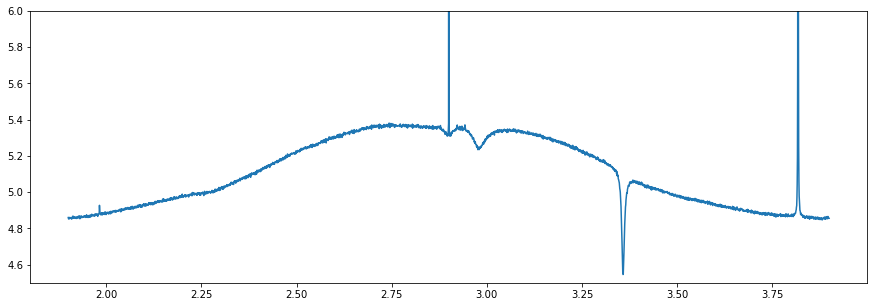

In [31]:
# notare che non è una linea dritta

plt.figure(figsize=(15,5))
plt.plot(data['freq'],data['fft0'])

#plt.vlines(info['cavfreq'][0],4,18,'green') # frequenza di cavità
plt.ylim([4.5,6])
plt.show()

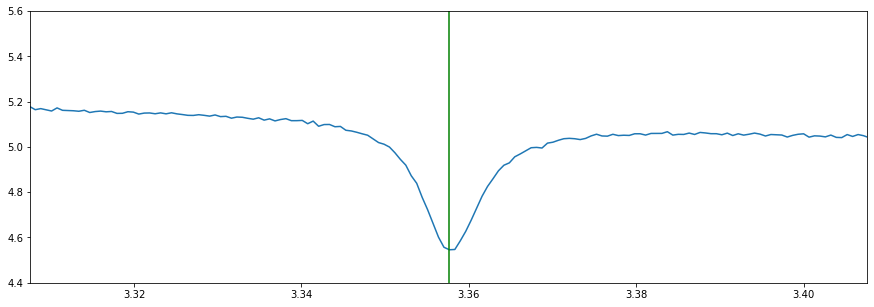

In [32]:
# zoom sulla cavità intorno a delta
delta = .05
center = info['cavfreq'][0]

plt.figure(figsize=(15,5))
plt.plot(data['freq'],data['fft0'])

plt.vlines(center,4,18,'green')
plt.ylim([4.4,5.6])
plt.xlim([center-delta,center+delta])
plt.show()

In [35]:
# ricarico il dataset, altrimenti non è semplice individuare il valore dei parametri in questa nuova trasformazione
data, info = load_dataset('db/',False)

[1.03532090e+10 6.06216334e+05 1.03531614e+10 5.88542312e+05
 7.00583561e-03 3.86056479e-12]


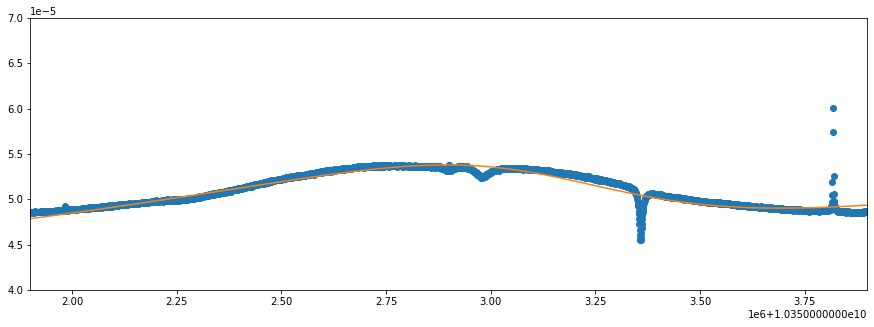

In [36]:
# Fit
def fitm(x,a,b,c,d,e,f):
    return e**2*abs(x-a+1j*b)**2/abs(x-c+1j*d)**2+f*(x-c)

center = info['cavfreq'][0]
fmin,fmax = min(data['freq']),max(data['freq'])
delta = .01
scale = 1e8    # fattore di scala per lo zoom

plt.figure(figsize=(15,5))
plt.plot(data['freq'],data['fft0'],'o')

#plt.vlines(center,0,6,'green')
#plt.ylim([4,6])
plt.ylim([4e-5,7e-5])
#plt.xlim([center-scale*delta,center+scale*delta])
plt.xlim([fmin,fmax])

# fit
interval = data[(data['freq']>center-scale*delta) & (data['freq']<center+scale*delta)] # finestra intorno alla cavità
xfreq = interval['freq']
yfft = interval['fft0']

param,cov = scipy.optimize.curve_fit(fitm, freq[1], fft[1], p0=[center,2e4,center,2.2e4,1e-2,1e-8],maxfev=10_000)
#param,cov = scipy.optimize.curve_fit(fitm, xfreq, yfft, p0=[center,2e4,center,2.2e4,1e-2,1e-8],maxfev=10_000)
print(param)
a,b,c,d,e,f = param
#x=np.linspace(center-scale*delta,center+scale*delta)
x=np.linspace(fmin,fmax)
plt.plot(x,fitm(x,a,b,c,d,e,f))

plt.show()

In [37]:
fmodel = Model(fitm)
ps = fmodel.make_params(a=center, b=2e4, c=center,d=2.2e4,e=1e-2,f=1e-8)
ps.add('a', value=center, min=center*0.999, max=center*1.01)
ps.add('c', value=center, min=center*0.999, max=center*1.01)

# solo in prossimità della cavità
#interval = data[(data['freq']>center-scale*delta) & (data['freq']<center+scale*delta)]

result = fmodel.fit(data['fft0'],x=data['freq'], params=ps)#, weights=pesi, x=convx)
#result = fmodel.fit(interval['fft0'],x=interval['freq'], params=ps)#, weights=pesi, x=convx)

In [38]:
result

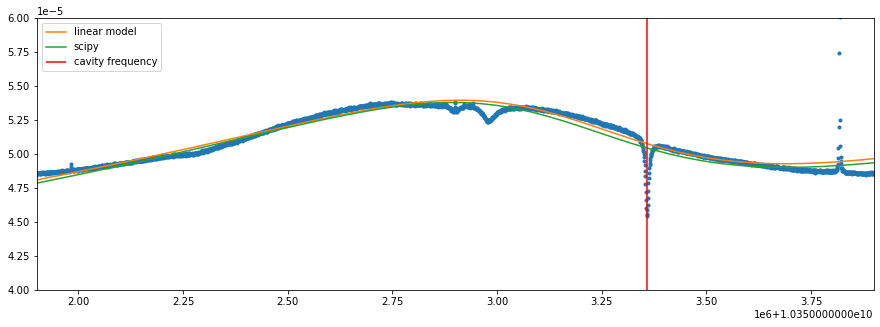

In [39]:
#scale=1
plt.figure(figsize=(15,5))
plt.ylim([4e-5,6e-5])
#plt.xlim([center-scale*delta,center+scale*delta])
plt.xlim([fmin,fmax])

plt.plot(data['freq'],data['fft0'],'.')
plt.plot(data['freq'],result.best_fit, label='linear model')
plt.plot(x,fitm(x,a,b,c,d,e,f),label='scipy')
plt.vlines(center,4e-5,6e-5,'red',label='cavity frequency')
#plt.plot(result.init_fit)

plt.legend()

plt.show()